# Imports

In [59]:
%load_ext autoreload
%autoreload 2
# In [2]: %autoreload 2
import cs7641assn4 as a4
import numpy as np
import pandas as pd
import warnings
import random

pd.set_option('display.max_columns', 35)
# pd.reset_option("display.max_columns")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Establish Environment

In [33]:
rH = -1 #-5 # reward for H(ole)
rG = 1 # 10 # reward for G(oal)
rF = -0.2# reward includes S(tart) and F(rozen)
size = 8 # height and width of square gridworld
p = 0.8 # if generating a random map probability that a grid will be F(rozen)
desc = None # frozen_lake.generate_random_map(size=size, p=p)
map_name = 'x'.join([str(size)]*2) # None
is_slippery = True


epsilon = 1e-8 # convergence threshold for policy/value iteration
gamma = 0.8 # discount parameter for past policy/value iterations
max_iter = 10000 # maximum iterations for slowly converging policy/value iteration 

# Qlearning(env, rH=0, rG=1, rF=0, qepsilon=0.1, lr=0.8, gamma=0.95, episodes=10000)
qepsilon = 0.1 # epsilon value for the Q-learning epsilon greedy strategy
lr = 0.8 # Q-learning rate
qgamma = 0.95 # Q-Learning discount factor
episodes = 10000 # number of Q-learning episodes
initial = 0 # value to initialize the Q grid

# Create Environment
env = a4.getEnv(env_id='hw4-FrozenLake-v{}'.format(random.randint(0,100000)), rH=rH, rG=rG, rF=rF, 
                desc=desc, map_name=map_name)

# Store a representation of the map
env_desc = env.desc.astype('<U8')

# Store a representation of the state rewards
env_rs = a4.getStateReward(env)

# Display reward at each state
print('\n--Reward Values at Each State--')
a4.matprint(a4.print_value(env_rs, width=size, height=size))

--Board--

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

--Actions for Position to the Left of the Goal--
{0: [(0.3333333333333333, 54, -1, True),
     (0.3333333333333333, 61, -0.2, False),
     (0.3333333333333333, 62, -0.2, False)],
 1: [(0.3333333333333333, 61, -0.2, False),
     (0.3333333333333333, 62, -0.2, False),
     (0.3333333333333333, 63, 1, True)],
 2: [(0.3333333333333333, 62, -0.2, False),
     (0.3333333333333333, 63, 1, True),
     (0.3333333333333333, 54, -1, True)],
 3: [(0.3333333333333333, 63, 1, True),
     (0.3333333333333333, 54, -1, True),
     (0.3333333333333333, 61, -0.2, False)]}

--Reward Values at Each State--
-0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  
-0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  
-0.2  -0.2  -0.2    -1  -0.2  -0.2  -0.2  -0.2  
-0.2  -0.2  -0.2  -0.2  -0.2    -1  -0.2  -0.2  
-0.2  -0.2  -0.2    -1  -0.2  -0.2  -0.2  -0.2  
-0.2    -1    -1  -0.2  -0.2  -0.2    -1  -0.2  
-0.2    -1  -0.2  -0.2    -1 

# Policy Iteration

In [4]:
pi_time = %timeit -o a4.policy_iteration(env, epsilon=epsilon, gamma=gamma, max_iter=max_iter, report=False)



3.57 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Policy iteration converged after  7 epochs
-0.9992  -0.9987  -0.9974   -0.995  -0.9904  -0.9824  -0.9707  -0.9647  
-0.9993  -0.9989  -0.9979  -0.9958  -0.9912  -0.9809  -0.9548  -0.9382  
-0.9997  -1.0347   -1.141       -5  -1.1636  -1.0177  -0.9217  -0.8751  
-0.9999  -1.1315  -1.4961  -2.6269  -1.6048       -5  -0.8763   -0.735  
-0.9999  -1.4585  -2.5879       -5  -1.4774  -1.2764  -0.8797   -0.396  
     -1       -5       -5  -3.2524  -1.9091  -1.6793       -5    0.396  
     -1       -5  -3.2628  -3.5374       -5  -2.3619       -5   2.2349  
     -1  -1.3448  -1.9482       -5  -2.6101  -0.4278   1.9353        5  
↑  →  →  →  →  →  →  →  
↑  ↑  ↑  ↑  ↑  ↑  →  ↓  
←  ←  ←  ←  →  ↑  →  ↓  
←  ←  ←  ↓  ←  ←  →  →  
←  ↑  ←  ←  →  ↓  ↑  →  
←  ←  ←  ↓  ↑  ←  ←  →  
←  ←  ↓  ↑  ←  ←  ←  →  
←  ↓  ←  ←  →  →  ↓  ←  
[['↑' '→' '→' '→' '→' '→' '→' '→']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '↓']
 ['←' '←' '←' '←' '→' '↑' '→' '↓']
 ['←' '←' '←' '↓' '←' '←' '→' '→']
 ['←' '↑' '←' '←' '→' '↓' '↑' '→'

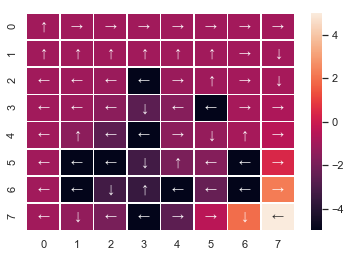

In [60]:
pi_V, pi_policy, pi_epochs = a4.policy_iteration(env, epsilon=epsilon, gamma=gamma, max_iter=max_iter, report=True)

# Display values
a4.matprint(a4.print_value(pi_V, width=size, height=size))

pi_policy_arrows = a4.print_policy(pi_policy, width=size, height=size)

# Display policy
a4.matprint(pi_policy_arrows)
draw_heatmap(pi_policy_arrows, pi_V, size)

# Value Iteration

In [6]:
vi_time = %timeit -o a4.valueIteration(env, epsilon=epsilon, gamma=gamma, max_iter=max_iter, report=False)


20 ms ± 653 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Value iteration converged after  91 epochs
-0.9992  -0.9987  -0.9974   -0.995  -0.9904  -0.9824  -0.9707  -0.9647  
-0.9993  -0.9989  -0.9979  -0.9958  -0.9912  -0.9809  -0.9548  -0.9382  
-0.9997  -1.0347   -1.141       -5  -1.1636  -1.0177  -0.9217  -0.8751  
-0.9999  -1.1315  -1.4961  -2.6269  -1.6048       -5  -0.8763   -0.735  
-0.9999  -1.4585  -2.5879       -5  -1.4774  -1.2764  -0.8797   -0.396  
     -1       -5       -5  -3.2524  -1.9091  -1.6793       -5    0.396  
     -1       -5  -3.2628  -3.5374       -5  -2.3619       -5   2.2349  
     -1  -1.3448  -1.9482       -5  -2.6101  -0.4278   1.9353        5  
↑  →  →  →  →  →  →  →  
↑  ↑  ↑  ↑  ↑  ↑  →  ↓  
←  ←  ←  ←  →  ↑  →  ↓  
←  ←  ←  ↓  ←  ←  →  →  
←  ↑  ←  ←  →  ↓  ↑  →  
←  ←  ←  →  ↑  ←  ←  →  
←  ←  ↓  ←  ←  ←  ←  →  
←  ↓  ←  ←  ↓  →  ↓  ←  
[['↑' '→' '→' '→' '→' '→' '→' '→']
 ['↑' '↑' '↑' '↑' '↑' '↑' '→' '↓']
 ['←' '←' '←' '←' '→' '↑' '→' '↓']
 ['←' '←' '←' '↓' '←' '←' '→' '→']
 ['←' '↑' '←' '←' '→' '↓' '↑' '→'

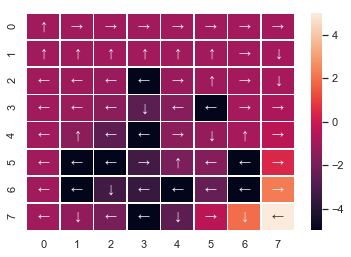

In [62]:
vi_V, vi_epochs = a4.valueIteration(env, epsilon=epsilon, gamma=gamma, max_iter=max_iter, report=True)

# display value function:
a4.matprint(a4.print_value(vi_V, width=size, height=size))

vi_policy = a4.value_to_policy(env, V=vi_V, gamma=gamma)

vi_policy_arrows = a4.print_policy(vi_policy, width=size, height=size)
# display policy
a4.matprint(vi_policy_arrows)
draw_heatmap(vi_policy_arrows, vi_V, size)

# Q-Learning

In [8]:
Q_time = %timeit -o a4.Qlearning(env, qepsilon, lr, qgamma, episodes)


3.54 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


--Q with all options--
 -3.02807   -3.03642   -2.55397   -3.05769  
 -2.98001   -2.75369   -2.96458   -3.04105  
 -2.92907   -2.96294   -2.39899   -2.97711  
 -2.76478   -2.95172   -2.84547   -2.75874  
 -2.80904   -2.87676   -2.82532   -2.79521  
 -2.46485   -3.02498   -2.99311   -2.87309  
 -2.48699   -3.03483   -3.03366   -3.01367  
 -2.86426   -3.04244   -3.10233   -3.07088  
 -2.88499   -2.58476   -2.89727   -2.75994  
 -2.89448   -2.39955   -2.89412   -2.89574  
  -2.9121   -2.43652    -2.8945   -2.75761  
 -2.96695   -2.54424    -2.9093   -2.92242  
  -2.8652   -2.90574   -2.24369   -2.80829  
 -2.14404   -2.57888   -2.63876     -2.905  
 -2.94165   -2.68791   -2.74013   -2.92674  
 -2.46119   -2.99372   -3.10735   -3.04911  
 -2.58935   -2.53104    -2.8451    -2.8933  
  -2.8252   -2.34478   -2.78601    -2.5775  
  -2.6413   -2.01167   -2.77607    -2.8682  
       -1         -1         -1         -1  
 -2.57642   -2.29436    -2.5474   -2.66226  
 -2.26909   -2.40369   -2.37416 

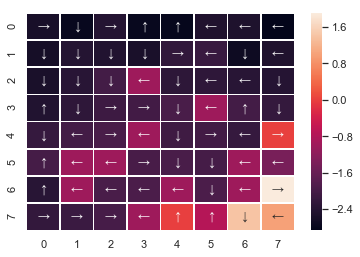

In [63]:
Q = a4.Qlearning(env, qepsilon, lr, qgamma, episodes)
print('--Q with all options--')
a4.matprint(Q)

maxQ = np.max(Q,axis=1)
print('\n--argmax(Q) in grid order--')
a4.matprint(a4.print_value(maxQ, width=size, height=size))

Q_policy = a4.Q_to_policy(Q)

Q_policy_arrows = a4.print_policy(Q_policy, width=size, height=size)
print('\n--Policy Matrix--')
a4.matprint(Q_policy_arrows)
draw_heatmap(Q_policy_arrows, maxQ, size)


In [11]:
Q_s, Q_steps = a4.Qlearning_trajectory(env, Q, render=False)



--Final position--
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Agent ended up at state 19 after 10 steps


# Notes

Default rewards are 1 for the G(oal) and 0 for everything else.

Maps are drawn according to the following logic

```
if desc and map_name are None, 
   then a default random map is drawn with 8
        using frozen_lake.generate_random_map(size=8, p=0.8)
elif desc is None and a map_name is given
   then a map_name is either '4x4' or '8x8'
        and is drawn from the dict MAPS in frozen_lake.py
elif desc is given
   then it must be in the form of a list with 
```

Default action probabilities are 1/3 chosen action, 1/3 each for right angles to chosen action, and 0 for reverse of chosen action. This is set with `is_slippery=True`. If `is_slippery=False`, then P=1 for chosen action and 0 for all other actions.

|ACTION|Value|Symbol|
|------|-----|------|
|LEFT  | 0   | ←    |
|DOWN  | 1   | ↓    |
|RIGHT | 2   | →    |
|UP    | 3   | ↑    |

# Sources

- Code: <https://github.com/Twice22/HandsOnRL>
- Tutorial: <https://twice22.github.io/>

# Save Results to DataFrame

In [13]:
results = pd.DataFrame({'rH': [rH], 
                        'rG': [rG], 
                        'rF': [rF], 
                        'size': [size], 
                        'p': [p], 
                        'desc': [desc], 
                        'map_name': [map_name],                        
                        'is_slippery': [is_slippery],
                        'epsilon': [epsilon],
                        'gamma': [gamma], 
                        'max_iter': [max_iter], 
                        'qepsilon': [qepsilon], 
                        'lr': [lr], 
                        'qgamma': [qgamma], 
                        'episodes': [episodes], 
                        'initial': [initial],
                        'env_desc': [env_desc],
                        'env_rs': [env_rs],
                        'pi_time': [pi_time.average],
                        'pi_V': [pi_V],
                        'pi_epochs': [pi_epochs],
                        'pi_policy': [pi_policy],
                        'pi_policy_arrows': [pi_policy_arrows],
                        'vi_time': [vi_time.average],
                        'vi_V': [vi_V],
                        'vi_epochs': [vi_epochs],
                        'vi_policy': [vi_policy],
                        'vi_policy_arrows': [vi_policy_arrows],
                        'Q_time': [Q_time.average],
                        'Q': [Q],
                        'Q_V': [maxQ],
                        'Q_policy': [Q_policy],
                        'Q_policy_arrows': [Q_policy_arrows]})

In [14]:
display(results)

,rH,rG,rF,size,p,desc,map_name,is_slippery,epsilon,gamma,max_iter,qepsilon,lr,qgamma,episodes,initial,env_desc,env_rs,pi_time,pi_V,pi_epochs,pi_policy,pi_policy_arrows,vi_time,vi_V,vi_epochs,vi_policy,vi_policy_arrows,Q_time,Q,Q_V,Q_policy,Q_policy_arrows
0,-1,1,-0.2,8,0.8,None,8x8,True,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,0,"[[S, F, F, F, F, F, F, F], [F, F, F, F, F, F, ...","[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0....",0.003766,"[-0.9992295366480467, -0.9986516891340815, -0....",7,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",0.019597,"[-0.999229537127132, -0.9986516896132036, -0.9...",91,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",3.735126,"[[-3.0798028223384275, -2.7657051548799516, -2...","[-2.7657051548799516, -2.6751444462574914, -2....","[1, 2, 1, 0, 2, 3, 1, 2, 2, 0, 2, 0, 3, 1, 3, ...","[[↓, →, ↓, ←, →, ↑, ↓, →], [→, ←, →, ←, ↑, ↓, ..."


# Save DataFrame to Disk

In [16]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
try:
    dataset = pd.read_hdf('data.h5', key='dataset', mode='a')
except FileNotFoundError:
    results.to_hdf('data.h5', key='dataset', mode='a')
else:
    dataset.append(
        other=results, 
        ignore_index=True
        ).to_hdf(
        path_or_buf='data.h5', 
        key='dataset', 
        mode='a')

In [17]:
pd.read_hdf('data.h5', key='dataset', mode='a')

,rH,rG,rF,size,p,desc,map_name,is_slippery,epsilon,gamma,max_iter,qepsilon,lr,qgamma,episodes,initial,env_desc,env_rs,pi_time,pi_V,pi_epochs,pi_policy,pi_policy_arrows,vi_time,vi_V,vi_epochs,vi_policy,vi_policy_arrows,Q_time,Q,Q_V,Q_policy,Q_policy_arrows
0,-1,1,-0.2,8,0.8,None,8x8,True,1.000000e-08,0.8,10000,0.1,0.8,0.95,10000,0,"[[S, F, F, F, F, F, F, F], [F, F, F, F, F, F, ...","[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0....",0.003766,"[-0.9992295366480467, -0.9986516891340815, -0....",7,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",0.019597,"[-0.999229537127132, -0.9986516896132036, -0.9...",91,"[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, ...","[[↑, →, →, →, →, →, →, →], [↑, ↑, ↑, ↑, ↑, ↑, ...",3.735126,"[[-3.0798028223384275, -2.7657051548799516, -2...","[-2.7657051548799516, -2.6751444462574914, -2....","[1, 2, 1, 0, 2, 3, 1, 2, 2, 0, 2, 0, 3, 1, 3, ...","[[↓, →, ↓, ←, →, ↑, ↓, →], [→, ←, →, ←, ↑, ↓, ..."
